# Problem 3: K-Means Clustering on Iris Dataset with Synthetic Samples (10 points)

## Problem Statement
You are tasked to explore **K-Means clustering** on the Iris dataset and extend it to predict clusters for **synthetic flower samples**.

## Tasks

**Part A (4 points):**  
- Load the **Iris dataset** from `sklearn.datasets`.  
- Split the dataset into **training (70%)** and **testing (30%)** sets.  
- Apply **K-Means clustering** on the training set with **k=3** (number of species).  
- Predict clusters for the test set and evaluate performance using **Adjusted Rand Index (ARI)**.

**Part B (3 points):**  
- Visualize the clusters using **Sepal Length vs Petal Width**.  
- Color points according to **predicted cluster labels** and overlay **true labels** for comparison.  
- Interpret the cluster separation visually.

**Part C (3 points):**  
- Create **3 synthetic flower samples** with feature values for Sepal Length, Sepal Width, Petal Length, and Petal Width.  
- Scale these synthetic samples using the same scaler as the training data.  
- Predict their cluster assignments using the trained K-Means model.  
- Interpret which cluster each synthetic flower belongs to.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [6]:
iris = load_iris()
x = pd.DataFrame(iris.data,columns=iris.feature_names)
y = iris.target

In [7]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(x_train_scaled)

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [19]:
y_pred_test = kmeans.predict(x_test_scaled)

In [20]:
ari_score = adjusted_rand_score(y_test,y_pred_test)
ari_score

0.6752456842939737

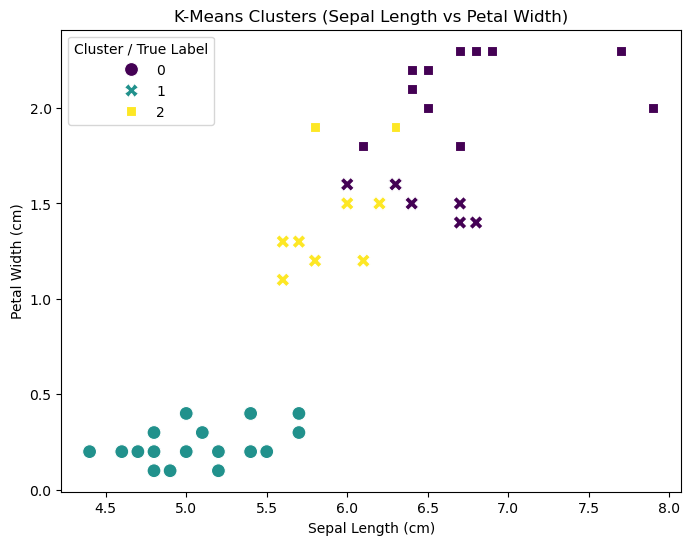

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_test['sepal length (cm)'],
y = x_test['petal width (cm)'],
hue = y_pred_test,
palette = 'viridis',
style=y_test,
s=100)
plt.title('K-Means Clusters (Sepal Length vs Petal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster / True Label')
plt.show()

In [23]:
synthetic_samples = pd.DataFrame([
    [5.0,3.5,1.5,0.2],
    [6.5,3.0,5.0,1.8],
    [5.8,2.8,4.0,1.2]
],columns=x.columns)

In [24]:
synthetic_scaled = scaler.transform(synthetic_samples)

synthetic_clusters = kmeans.predict(synthetic_scaled)
synthetic_samples['Predicted Cluster'] = synthetic_clusters
synthetic_samples

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predicted Cluster
0,5.0,3.5,1.5,0.2,1
1,6.5,3.0,5.0,1.8,0
2,5.8,2.8,4.0,1.2,2
